In [ ]:
# ✅ 설치후 세션 다시 시작!
# 설치: fasttext와 transformers
!pip install fasttext transformers -q gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 23.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


# 벡터 유사도 개념

https://projector.tensorflow.org/


유사도 기반 알고리즘: 유클라디안 유사도(Euclidean Similarity), 코사인유사도(Cosine Similarity), 자카드 유사도(Jaccard Similarity), 맨하튼 거리(Manhattan distance) 등 여러방법이 있다.

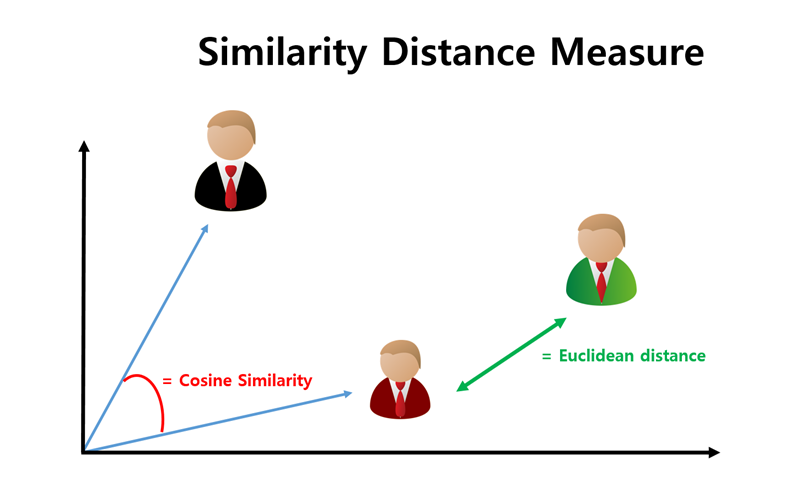

## Euclidean Similarity: n 차원의 공간에서 2vector 사이의 최단 거리를 구하는 방법이다. 일반적인 유사도들은 0~1 혹은 -1 ~ 1 사이의 값을 가지는데 Euclidean Similiarity는 거리를 구하는 방법이기 때문에 값의 범위가 무한대이다.

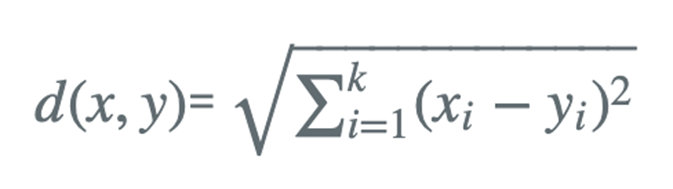

In [ ]:
import numpy as np

# numpy 배열로 두 점을 정의합니다.
point1 = np.array((1, 2, 3))  # 첫 번째 점 (1, 2, 3)
point2 = np.array((1, 1, 1))  # 두 번째 점 (1, 1, 1)

# 벡터 뺄셈: 두 점 사이의 차이를 계산합니다.
# 각 좌표를 빼서 (1, 2, 3) - (1, 1, 1) = (0, 1, 2)가 됩니다.
temp = point1 - point2

# 벡터 내적 (dot product)을 구합니다.
# temp.T는 temp의 전치(transpose)로, 원래 temp는 1차원 배열이므로 temp.T는 여전히 1차원 배열입니다.
# np.dot(temp.T, temp)는 벡터의 내적을 계산하는데, 여기서는 각 요소의 제곱을 더하는 것과 같습니다.
# 즉, 0^2 + 1^2 + 2^2 = 0 + 1 + 4 = 5가 됩니다.
sum_sq = np.dot(temp.T, temp)

# np.sqrt(sum_sq)는 제곱근을 계산하는 함수로, sum_sq = 5의 제곱근을 구합니다.
# √5 ≈ 2.236 이 됩니다. 즉, 두 점 사이의 유클리드 거리가 약 2.236이라는 뜻입니다.
print(np.sqrt(sum_sq))


2.23606797749979


코사인유사도(Cosine Similarity)

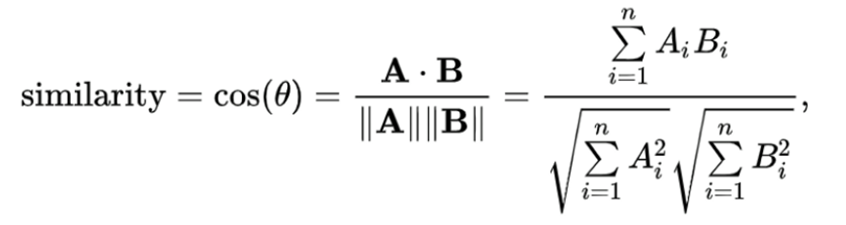

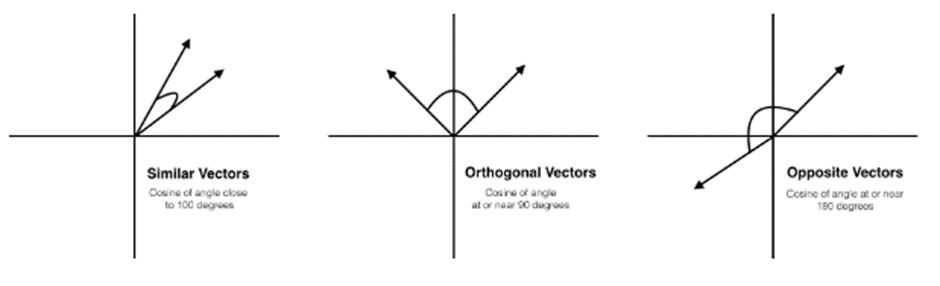

Cosine Similarity = 1, 코사인 유사도가 1에 가까울수록 유사하다

Cosine Similarity = 0, 코사인 유사도가 0에 가까울수록 무관하다

Cosine Similarity = -1, 코사인 유사도가 -1에 가까울수록 반대이다


In [ ]:
from numpy import dot
from numpy.linalg import norm

List1 = [4, 47, 8, 3]
List2 = [3, 52, 12, 16]

result = dot(List1, List2)/(norm(List1)*norm(List2))
print(result)

0.9720951480078084


In [ ]:
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 사전 학습된 GloVe 모델 로드
glove_model = api.load("glove-wiki-gigaword-300")

# 단어 임베딩 벡터 가져오기
def get_glove_embedding(word):
    try:
        return glove_model[word]
    except KeyError:
        return None

# 임베딩 벡터 비교 함수
def compare_embeddings_glove(word1, word2):
    vec1 = get_glove_embedding(word1)
    vec2 = get_glove_embedding(word2)

    if vec1 is None or vec2 is None:
        print(f"GloVe 모델에서 '{word1}' 또는 '{word2}'의 임베딩을 찾을 수 없습니다.")
        return

    similarity = cosine_similarity([vec1], [vec2])[0][0]
    print(f"GloVe 유사도 ({word1}, {word2}): {similarity:.4f}")

# 테스트 실행
compare_embeddings_glove("king", "president")


[==================================================] 100.0% 376.1/376.1MB downloaded
GloVe 유사도 (king, president): 0.2672


# Word2Vec 임베딩 유사도 계산

In [ ]:

# 사전 학습된 Word2Vec 모델 로드 (Google News 벡터)
w2v_model = api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
# 두 단어의 임베딩 벡터를 비교 및 출력
def compare_embeddings(word1, word2):
    # Word2Vec 임베딩
    w2v_embedding1 = get_word2vec_embedding(word1)
    w2v_embedding2 = get_word2vec_embedding(word2)

    if w2v_embedding1 is None or w2v_embedding2 is None:
        print(f"Word2Vec 모델에서 '{word1}' 또는 '{word2}'의 임베딩을 찾을 수 없습니다.")
        return

    # 벡터 출력
    #print(f"\nWord2Vec 임베딩 for '{word1}':\n{w2v_embedding1}")
    #print(f"Word2Vec 임베딩 for '{word2}':\n{w2v_embedding2}")

    # 각 모델 간 임베딩 비교 (코사인 유사도 사용)
    print(f"\nWord2Vec 유사도 ({word1}, {word2}): {cosine_similarity(w2v_embedding1, w2v_embedding2)}")




In [ ]:

# 단어를 Word2Vec 임베딩 벡터로 변환하는 함수 정의
def get_word2vec_embedding(word):
    if word in w2v_model:
        return w2v_model[word].reshape(1, -1)  # reshape for cosine_similarity
    else:
        return None

# 두 단어 간 임베딩 벡터 비교 함수
def compare_embeddings(word1, word2):
    w2v_embedding1 = get_word2vec_embedding(word1)
    w2v_embedding2 = get_word2vec_embedding(word2)

    if w2v_embedding1 is None or w2v_embedding2 is None:
        print(f"Word2Vec 모델에서 '{word1}' 또는 '{word2}'의 임베딩을 찾을 수 없습니다.")
        return

    similarity = cosine_similarity(w2v_embedding1, w2v_embedding2)[0][0]
    print(f"\nWord2Vec 유사도 ({word1}, {word2}): {similarity:.4f}")

# 테스트 실행
word1 = "king"
word2 = "president"
compare_embeddings(word1, word2)


Word2Vec 유사도 (king, president): 0.2016


# Sentence BERT 임베딩 유사도 계산

In [ ]:
from sentence_transformers import SentenceTransformer

# 사전 학습된 Sentence-BERT 모델 로드
sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


In [ ]:

# 임베딩 벡터 가져오기 함수 정의
def get_sbert_embedding(text):
    return sbert_model.encode([text])  # 2D array로 반환


In [ ]:
# 두 단어의 임베딩 벡터를 비교 및 출력
def compare_embeddings(word1, word2):

    # Sentence-BERT 임베딩
    sbert_embedding1 = get_sbert_embedding(word1)
    sbert_embedding2 = get_sbert_embedding(word2)
    if sbert_embedding1 is None or sbert_embedding2 is None:

        print(f"Word2Vec 모델에서 '{word1}' 또는 '{word2}'의 임베딩을 찾을 수 없습니다.")
        return

    #print(f"\nSentence-BERT 임베딩 for '{word1}':\n{sbert_embedding1}")
    #print(f"Sentence-BERT 임베딩 for '{word2}':\n{sbert_embedding2}")

    # 각 모델 간 임베딩 비교 (코사인 유사도 사용)
    print(f"Sentence-BERT 유사도 ({word1}, {word2}): {cosine_similarity(sbert_embedding1, sbert_embedding2)}")


In [ ]:
# 테스트 실행 (단어: '강아지', '멍멍이')
word1 = "king"
word2 = "president"
compare_embeddings(word1, word2)

Sentence-BERT 유사도 (king, president): [[0.52093047]]


# Openai Ada 임베딩 유사도 계산

In [ ]:
!pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.78.1
    Uninstalling openai-1.78.1:
      Successfully uninstalled openai-1.78.1


In [ ]:
import openai
# OpenAI Ada 모델 임베딩 가져오기
# 수치로 비교하는게 요금이 저렴하다는 장점이 있음!

def get_openai_embedding(text):
    response = openai.Embedding.create(
        input=text,
        model="text-embedding-ada-002"
    )
    return np.array(response['data'][0]['embedding'])

# 두 단어의 임베딩 벡터를 비교 및 출력
def compare_embeddings(word1, word2):
    openai_embedding1 = get_openai_embedding(word1).reshape(1, -1)
    openai_embedding2 = get_openai_embedding(word2).reshape(1, -1)

    if openai_embedding1 is None or openai_embedding2 is None:
        print(f"Ada 모델에서 '{word1}' 또는 '{word2}'의 임베딩을 찾을 수 없습니다.")
        return

    similarity = cosine_similarity(openai_embedding1, openai_embedding2)[0][0]
    print(f"OpenAI Ada 유사도 ({word1}, {word2}): {similarity:.4f}")

# 테스트 실행
compare_embeddings("king", "president")


OpenAI Ada 유사도 (king, president): 0.7999
